üåæ An√°lise de Dados Agr√≠colas

Este notebook realiza uma an√°lise explorat√≥ria e preditiva com base em condi√ß√µes de solo e clima, visando identificar o melhor tipo de cultura agr√≠cola a ser cultivada.


In [5]:
import pandas as pd


from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Atividade_Cap_14_produtos_agricolas.csv')
df.head()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Distribui√ß√£o das culturas
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette="viridis")
plt.title("Distribui√ß√£o das Culturas no Dataset")
plt.xlabel("N√∫mero de Amostras")
plt.ylabel("Cultura")
plt.tight_layout()
plt.show()




Saving Atividade_Cap_14_produtos_agricolas.csv to Atividade_Cap_14_produtos_agricolas (1).csv


<ipython-input-5-ac49e9ab88d0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette="viridis")


In [6]:
# 2. Correla√ß√£o entre vari√°veis
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['label']).corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Mapa de Correla√ß√£o entre as Vari√°veis")
plt.show()



<ipython-input-7-2701903cee0d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='ph', palette='Set3')


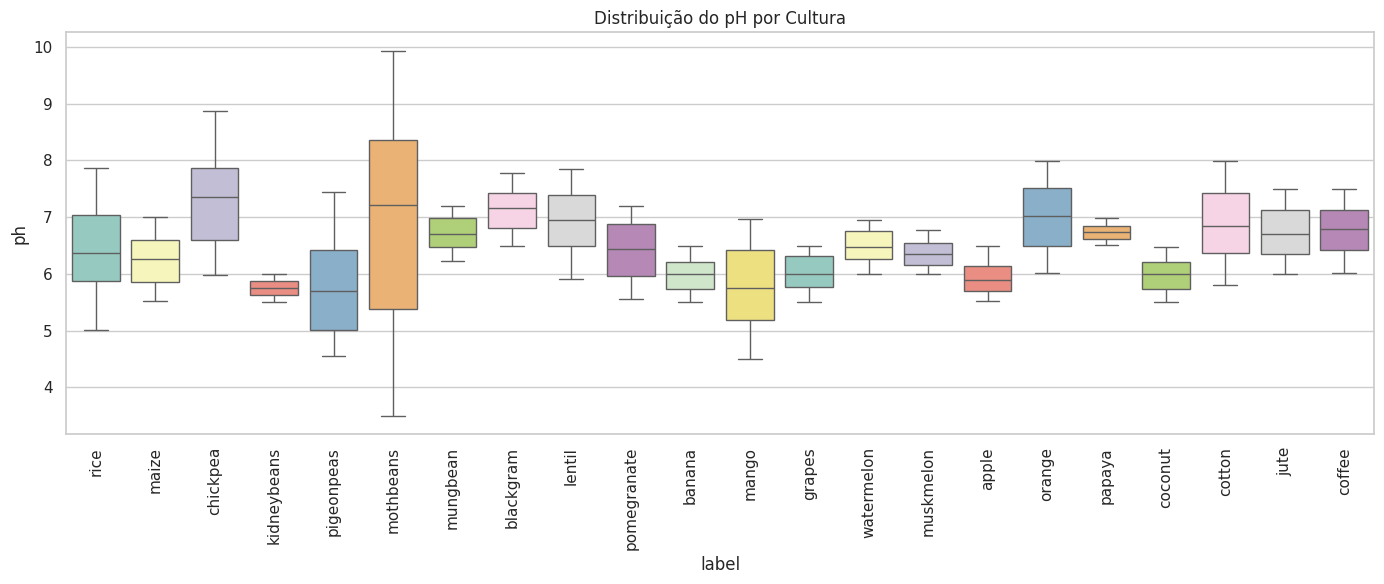

In [7]:
# 3. Boxplot de pH por cultura
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='label', y='ph', palette='Set3')
plt.title("Distribui√ß√£o do pH por Cultura")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



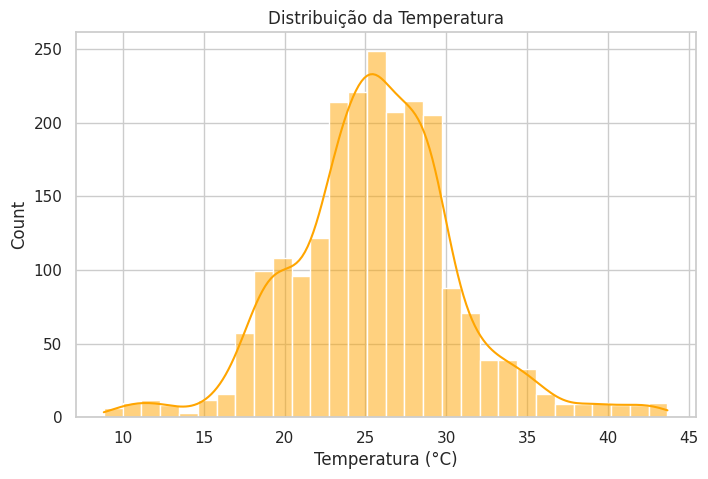

In [8]:
# 4. Histograma da Temperatura
plt.figure(figsize=(8, 5))
sns.histplot(df['temperature'], kde=True, color='orange', bins=30)
plt.title("Distribui√ß√£o da Temperatura")
plt.xlabel("Temperatura (¬∞C)")
plt.show()



<ipython-input-9-f49ebb9811d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_rainfall.values, y=mean_rainfall.index, palette='Blues_d')


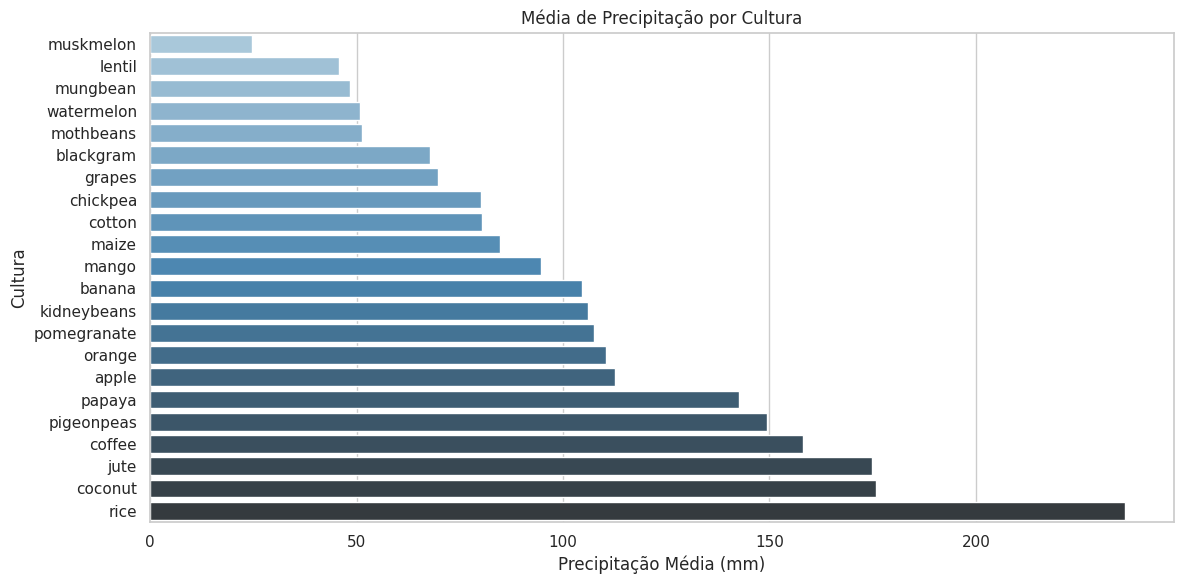

In [9]:
# 5. Precipita√ß√£o por cultura (m√©dia)
plt.figure(figsize=(12, 6))
mean_rainfall = df.groupby('label')['rainfall'].mean().sort_values()
sns.barplot(x=mean_rainfall.values, y=mean_rainfall.index, palette='Blues_d')
plt.title("M√©dia de Precipita√ß√£o por Cultura")
plt.xlabel("Precipita√ß√£o M√©dia (mm)")
plt.ylabel("Cultura")
plt.tight_layout()
plt.show()

üå± Perfil Ideal e Compara√ß√£o com Culturas

In [10]:
# Perfil ideal
perfil_ideal = df.drop(columns='label').mean()

# Tr√™s culturas distintas
culturas_escolhidas = ['rice', 'chickpea', 'mango']
medias_culturas = df[df['label'].isin(culturas_escolhidas)].groupby('label').mean()

# Compara√ß√£o
comparacao = medias_culturas.copy()
comparacao.loc['perfil_ideal'] = perfil_ideal
comparacao

N          P          K  temperature   humidity  \
label                                                                   
chickpea      40.090000  67.790000  79.920000    18.872847  16.860439   
mango         20.070000  27.180000  29.920000    31.208770  50.156573   
rice          79.890000  47.580000  39.870000    23.689332  82.272822   
perfil_ideal  50.551818  53.362727  48.149091    25.616244  71.481779   

                    ph    rainfall  
label                               
chickpea      7.336957   80.058977  
mango         5.766373   94.704515  
rice          6.425471  236.181114  
perfil_ideal  6.469480  103.463655

In [11]:
# Gr√°fico comparativo
comparacao_plot = comparacao.T
comparacao_plot.plot(kind='bar', figsize=(14, 6))
plt.title("Compara√ß√£o do Perfil Ideal com Rice, Chickpea e Mango")
plt.ylabel("Valor M√©dio")
plt.xlabel("Vari√°vel")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Cultura")
plt.tight_layout()
plt.show()